In [4]:
# Intial Check
import numpy as np
import pandas as pd

In [5]:
# read the file
refugee = pd.read_csv("UNdata_Export_20161102_000521483.csv")

In [6]:
# check the dataframe
refugee

,Country or territory of asylum or residence,Country or territory of origin,Year,Refugees<sup>*</sup>,Refugees assisted by UNHCR,Total refugees and people in refugee-like situations<sup>**</sup>,Total refugees and people in refugee-like situations assisted by UNHCR
0,Afghanistan,Iraq,2013.0,1.0,1.0,1.0,1.0
1,Afghanistan,Islamic Rep. of Iran,2013.0,36.0,36.0,36.0,36.0
2,Afghanistan,Pakistan,2013.0,34.0,34.0,16825.0,16825.0
3,Afghanistan,State of Palestine,2013.0,1.0,1.0,1.0,1.0
4,Albania,Algeria,2013.0,0.0,0.0,0.0,0.0
5,Albania,China,2013.0,12.0,12.0,12.0,12.0
6,Albania,Dem. Rep. of the Congo,2013.0,5.0,5.0,5.0,5.0
7,Albania,Egypt,2013.0,3.0,3.0,3.0,3.0
8,Albania,Iraq,2013.0,5.0,5.0,5.0,5.0
9,Albania,Montenegro,2013.0,2.0,2.0,2.0,2.0


In [7]:
refugee.columns = ['Country_Residence','Country_Origin','Year','Refugees','Refugees_UNHCR',\
                   'Total_Refugees', 'Total_Refugess_UNHCR']

In [8]:
refugee_by_year = pd.DataFrame(refugee['Refugees'].groupby(refugee.Year).agg('sum'))
refugee_by_year.index
refugee_by_year.columns = ['Sum']

In [9]:
year = pd.Series(refugee_by_year.index.values)
count = pd.Series(refugee_by_year.Sum.values)

In [10]:
refugee_df = pd.DataFrame(year, columns=['year'])
refugee_df['Sum'] = count

In [11]:
refugee_df

,year,Sum
0,1975.0,3529434.0
1,1976.0,4270631.0
2,1977.0,4518659.0
3,1978.0,5065844.0
4,1979.0,6279912.0
5,1980.0,8454937.0
6,1981.0,9714306.0
7,1982.0,10319369.0
8,1983.0,10620803.0
9,1984.0,10728326.0


In [9]:
# import the matplotlib for plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

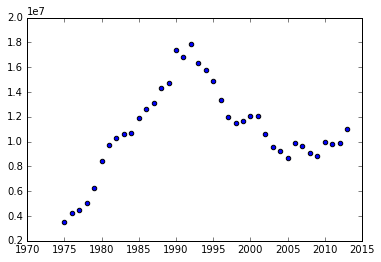

In [10]:
mpl.pyplot.scatter(refugee_df['year'], refugee_df['Sum'])

### Linear Regression

In [76]:
# Dataframe 
print ("Number of observations: {}\nNumber of features {}".\
    format(refugee_df.shape[0], refugee_df.shape[1]))

Number of observations: 39
Number of features 2


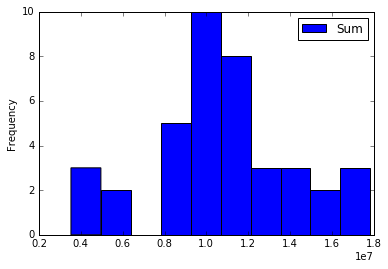

In [77]:
# plot
refugee_df[['Sum']].plot(kind='hist');

In [78]:
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()

In [80]:
# fit the model
linear_regression_model.fit(refugee_df[['year']], refugee_df[['Sum']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
# examine
linear_regression_model.intercept_

array([ -1.07271588e+08])

In [82]:
linear_regression_model.coef_

array([[ 59301.38259109]])

In [84]:
# Predict the data
yhat = linear_regression_model.predict(refugee_df[['year']])

In [86]:
((yhat-refugee_df[['Sum']])**2).mean()

Sum    1.150823e+13
dtype: float64

### Nearest Neighbors

In [87]:
from sklearn.neighbors import KNeighborsRegressor

In [89]:
# define the model
nn_model = KNeighborsRegressor(n_neighbors=5)

In [91]:
# fit the model
nn_model.fit(refugee_df[['year']],refugee_df[['Sum']])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [92]:
yhat2 = nn_model.predict(refugee_df[['year']])

In [93]:
(yhat2 - refugee_df[['Sum']]).mean()

Sum    10151.753846
dtype: float64

### Assesing model Accuracy

In [95]:
import seaborn as sns
sns.set_style("white")

In [97]:
# Let's split the training data into three components
from sklearn.cross_validation import train_test_split

In [99]:
# split
Year_train_validation, Year_test, Sum_train_validation, Sum_test = train_test_split(refugee_df[['year']],\
                                    refugee_df[['Sum']], test_size = 0.1, random_state = 0)

In [108]:
# split training into train and validation
Year_train, Year_validation, Sum_train, Sum_validation = train_test_split(Year_train_validation, Sum_train_validation,\
                                                                     test_size = 0.2, random_state = 0)

##### Model Fitting

In [103]:
model1 = LinearRegression().fit(Year_train, Sum_train) # fit

In [105]:
# Compute the MSE
model1_train_err = ((model1.predict(Year_train) - Sum_train)**2).mean()[0]

In [107]:
model1_train_err

12289484957857.613

In [109]:
# model validation
model1_validation_err = ((model1.predict(Year_validation) - Sum_validation)**2).mean()[0]

In [110]:
model1_validation_err

10681865733229.1

In [111]:
# model test
model1_test_err = ((model1.predict(Year_test) - Sum_test)**2).mean()[0]

In [112]:
model1_test_err

9304928864640.666

## Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
from numpy import genfromtxt, savetxt

In [14]:
# create and test data set
train = refugee[1:52800]  # train
test = refugee[52801:]    # test

In [23]:
X = train['Year']
y = train['Refugees']

X_list = train['Year'].tolist()
y_list = train['Refugees'].tolist()

In [16]:
# Create a Random Forest classifier
model_forest = RandomForestClassifier(n_estimators = 100)

In [ ]:
# fit the training data  to the survival labels and create a decision tree
model_forest = forest.fit(X_list,y_list)